In [44]:
import matplotlib as mt
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pylab as plt
from scipy import signal
from functools import reduce
import scipy
import time
%matplotlib inline

data = pd.read_csv("HS_C12.csv",header=2, encoding ='cp932')
data = data.convert_objects(convert_numeric=True)
pct = data.C_TRQENG.pct_change()

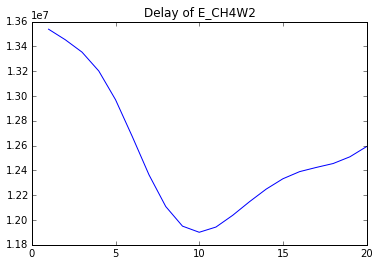

Chosen delay = [0] seconds


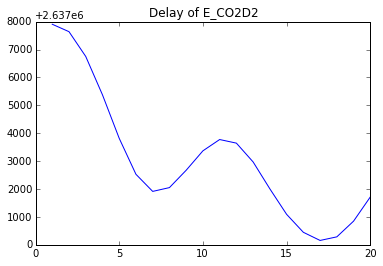

Chosen delay = [0] seconds


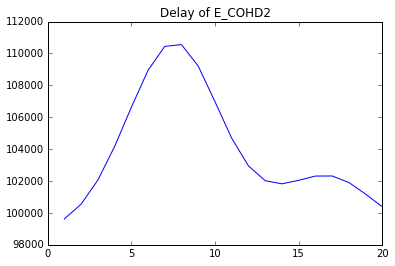

Chosen delay = [7] seconds


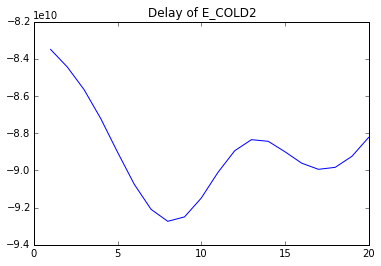

Chosen delay = [7] seconds


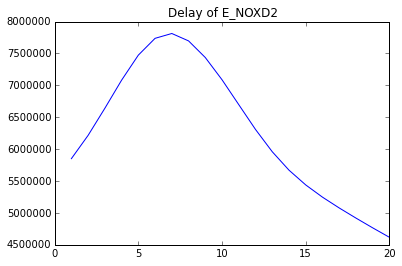

Chosen delay = [6] seconds


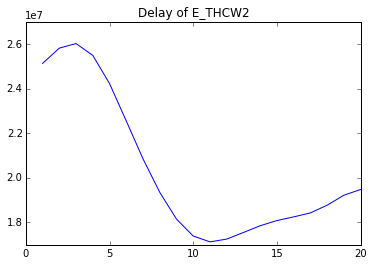

Chosen delay = [2] seconds


In [45]:
species = [col for col in list(data) if col.startswith('E_')]
for sp in species:
    air = data.get(sp)
    power = data.C_TRQENG
    delay = 0
    delay_df  = np.arange(1,21,1)

    while delay < 20:
        product = np.zeros(len(air)-20)
        for i in range(1, len(air)-20):
            product[i] = air[i+delay]*power[i]
        delay_df[delay] = sum(product)
        delay +=1

    x = np.arange(1,21,1)
    plt.plot(x,delay_df)
    plt.title('Delay of ' + sp)
    plt.show()
    max_value = max(delay_df)
    min_value = min(delay_df)
    if sum(product) >0:
        print('Chosen delay = '+str([i for i, j in enumerate(delay_df) if j == max_value]) +' seconds')
    else:
        print('Chosen delay = '+str([i for i, j in enumerate(delay_df) if j == min_value]) +' seconds')

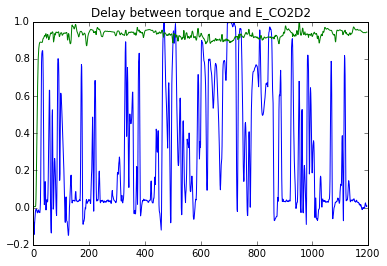

In [41]:
import matplotlib.pyplot as plt
species = 'E_CO2D2'
species2 = 'E_NOXD2'

x = np.arange(1,len(data),1)
y1 = data.C_TRQENG[1:len(data)+1]/np.nanmax(data.C_TRQENG, axis=0)[1]
#y1 = data.get(species2)[1:len(data)+1]/np.nanmax(data.get(species2), axis=0)[1]
y2 = data.get(species)[1:len(data)+1]/np.nanmax(data.get(species), axis=0)[1]
plt.plot(x,y1,x,y2)
plt.title('Delay between torque and ' +species)
plt.show()


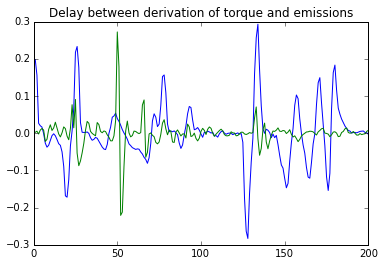

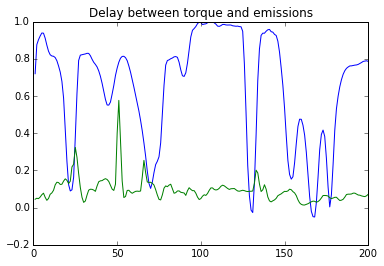

In [33]:
import scipy as sc
start = 600
end = 800

dy1 = np.zeros(len(data))
dy2 = np.zeros(len(data))

for i in range(2,len(y1)):
    dy1[i-1] = y1[i]-y1[i-1]
    dy2[i-1] = y2[i]-y2[i-1]

x = np.arange(1,end - start+1,1)
dy_1 = dy1[start:end]
dy_2 = dy2[start:end]

plt.plot(x,dy_1,x,dy_2)
plt.title('Delay between derivation of torque and emissions')
plt.show()

y_1 = y1[start:end]
y_2 = y2[start:end]

plt.plot(x,y_1,x,y_2)
plt.title('Delay between torque and emissions')
plt.show()

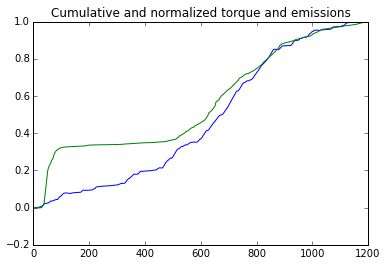

In [34]:
s1 = np.zeros(len(data))
s2 = np.zeros(len(data))
x = np.arange(1,len(data)+1,1)

for i in range(2,len(data)):
    s1[i] = s1[i-1]+ y1[i-1]
    s2[i] = s2[i-1]+ y2[i-1]

s1 = s1/max(s1)
s2 = s2/max(s2)
plt.plot(x,s1,x,s2)
plt.title('Cumulative and normalized torque and emissions')
plt.show()

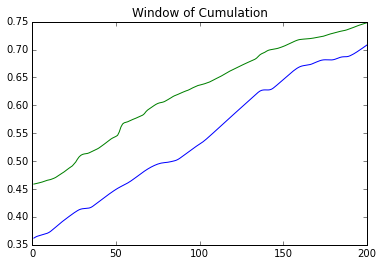

In [35]:
start = 600
end = 800

s_1 = s1[start-8:end-8]
s_2 = s2[start:end]
x = np.arange(1,end - start+1,1)

plt.plot(x,s_1,x,s_2)
plt.title('Window of Cumulation')
plt.show()

[24, 300, 483, 652, 765, 993, 1112, 1345] [9, 240, 472, 596, 711, 814, 1060, 1349]


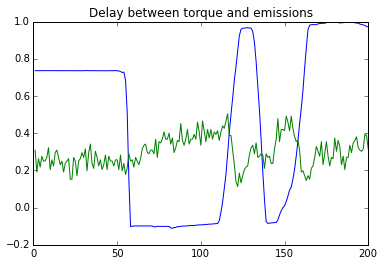

In [25]:
peak_torque =  sc.signal.find_peaks_cwt(y1,np.arange(1,200))
peak_emission =  sc.signal.find_peaks_cwt(y2,np.arange(1,200))
print(peak_torque,peak_emission)

x = np.arange(1,end - start+1,1)
y_1 = y1[start:end]
y_2 = y2[start:end]

plt.plot(x,y_1,x,y_2)
plt.title('Delay between torque and emissions')
plt.show()

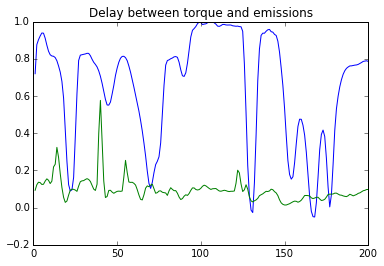

In [36]:
delay = 11

x = np.arange(1,end - start+1,1)
y_1 = y1[start:end]
y_2 = y2[start+delay:end+delay]

plt.plot(x,y_1,x,y_2)
plt.title('Delay between torque and emissions')
plt.show()

In [181]:
len(y2)

1353

In [198]:
test = np.correlate(y1,y2, mode='full')
len(test)

2705